# Laporan Proyek Awal Machine Learning - Samuel Christian Hamdani

## Domain Proyek


---

###Latar Belakang
Kualitas air kolam merupakan faktor krusial dalam keberhasilan budidaya ikan. Parameter seperti pH, suhu, dan tingkat kekeruhan air sangat mempengaruhi kesehatan dan pertumbuhan ikan. Kondisi air yang tidak sesuai dapat menyebabkan stres, penyakit, bahkan kematian pada ikan. Oleh karena itu, pemantauan kualitas air secara berkala sangat diperlukan untuk menjaga keberlangsungan ekosistem kolam dan meningkatkan produktivitas budidaya.

Namun, pengawasan kualitas air secara manual membutuhkan waktu, tenaga, dan keterampilan teknis yang tidak sedikit. Di sisi lain, perkembangan teknologi analisis data dan machine learning saat ini memungkinkan pemanfaatan data historis untuk membangun model prediktif yang dapat membantu dalam pengambilan keputusan secara cepat dan akurat.

Melalui proyek ini, dikembangkan sebuah model klasifikasi prediktif untuk menilai tingkat kualitas air kolam (Baik, Cukup, atau Buruk) berdasarkan data parameter fisik-kimia air dan jenis ikan yang dibudidayakan. Model ini dibangun menggunakan beberapa algoritma machine learning, seperti K-Nearest Neighbor (KNN), Random Forest, dan AdaBoost, untuk membandingkan performa masing-masing dan menentukan algoritma yang paling tepat digunakan dalam konteks ini.

Hasil dari proyek ini diharapkan dapat memberikan solusi berbasis data untuk mempermudah pemilik kolam dalam memantau kualitas air dan mengambil tindakan preventif secara efisien, sehingga mendukung praktik budidaya ikan yang lebih sehat, produktif, dan berkelanjutan.

###Problem Statements


1.   Kualitas air kolam yang buruk dapat menyebabkan pertumbuhan ikan terganggu, stres, bahkan kematian, yang berdampak pada kerugian ekonomi bagi pembudidaya.
2.   Pemantauan kualitas air secara manual membutuhkan waktu, tenaga, dan keahlian yang tidak semua pemilik kolam miliki.

###Goals

Mengembangkan sebuah model dalam memprediksi tingkat kualitas air kolam berdasarkan parameter pH, suhu, kekeruhan, dan jenis ikan. Dengan adanya model ini, pemilik kolam dapat memperoleh informasi prediktif secara langsung dari data pemantauan, sehingga dapat mengambil tindakan lebih cepat dan efisien dalam menjaga kualitas air kolam dan kesehatan ikan.


###Solution Statements
1. Mengembangkan model **klasifikasi** prediktif dengan pendekatan supervised learning untuk mengkategorikan kualitas air kolam menjadi Baik, Cukup, dan Buruk.
2. Melatih dan menguji tiga algoritma machine learning (KNN, Random Forest, dan AdaBoost) dengan dataset kualitas air untuk memperoleh performa terbaik.

#Data Understanding


---



Pada tahap ini dilakukan eksplorasi awal terhadap data yang digunakan untuk membangun model prediktif. Dataset yang digunakan berisi beberapa fitur penting yang memengaruhi kualitas air kolam dan jenis ikan yang dibudidayakan.

## Sumber Data
Data diperoleh dari pengukuran parameter air kolam yang meliputi:
1. Jenis ikan yang dibudidayakan
2. Nilai pH air
3. Suhu air (dalam derajat Celsius)
4. Tingkat kekeruhan air (dalam NTU atau satuan sejenis)
5. Label kualitas air (Baik, Cukup, Buruk)

## Deskripsi Fitur
Berikut adalah penjelasan masing-masing fitur dalam dataset:
1. Jenis_Ikan (categorical): Menyatakan jenis ikan yang dibudidayakan di kolam.
2. pH (numerical): Mengukur tingkat keasaman air kolam. Nilai pH yang ideal biasanya berada pada kisaran 6,5–8,5.
3. Suhu (numerical): Suhu air kolam yang berpengaruh terhadap metabolisme ikan. Suhu optimal umumnya sekitar 20–30°C, tergantung jenis ikan.
4. Kekeruhan (numerical): Menunjukkan kejernihan air kolam. Air yang terlalu keruh dapat menghambat fotosintesis dan membahayakan ikan.
5. Kualitas_Air (categorical – target): Label hasil pengukuran kualitas air kolam, diklasifikasikan menjadi tiga kelas: Baik, Cukup, dan Buruk.

## Proses Eksplorasi Awal
Pada bagian ini, dilakukan beberapa tahapan awal yang dilakukan sebelum pengembangan model, diantaranya:
1. Load Dataset

  Dataset diupload dari google drive yang dimana sudah didownload dari sumber (Kaggle) agar dapat digunakan untuk identifikasi tingkat kualitas air yang menyimpan data seperti jenis ikan, tingkat ph, suhu, dan tingkat kekeruhan

2. Pemeriksaan Nilai Kosong

  Dataset diperiksa untuk mengetahui apakah terdapat nilai yang hilang atau tidak valid. Jika ditemukan, dilakukan penanganan seperti imputasi atau penghapusan baris.

3. Distribusi Data

  Dilakukan visualisasi distribusi nilai untuk fitur numerik (pH, suhu, kekeruhan) untuk memahami pola dan outlier.

4. Analisis Korelasi (Univariate Analysis)

  Matriks korelasi dibuat untuk melihat hubungan antar variabel numerik serta potensi pengaruhnya terhadap kualitas air.

5. Analisis Fitur Kategorikal (Multivariate Analysis)

  Frekuensi jenis ikan dan distribusinya terhadap label kualitas air dianalisis untuk mengetahui pola yang mungkin muncul.

Sumber Dataset : https://www.kaggle.com/datasets/monirmukul/realtime-pond-water-dataset-for-fish-farming?select=realfishdataset.csv

Referensi:
https://www.sciencedirect.com/science/article/pii/S2352340923008302

###Import Library
Hal pertama yang dilakukan sebelum membuat model adalah mengimpor pustaka (library) yang digunakan dalam file ini berupa pandas, seaborn, matplotlib, dan sklearn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

###Load Dataset
Selanjutnya, dataset diupload terlebih dahulu menggunakan fungsi 'read_csv' dari library pandas untuk memasukkan dataset kedalam environment agar digunakan dalam pengembangan model.

In [ ]:
#Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Dicoding_ML/Predictive_analytics/realfishdataset.csv')
df

,ph,temperature,turbidity,fish
0,6.00,27.00,4.00,katla
1,7.60,28.00,5.90,sing
2,7.80,27.00,5.50,sing
3,6.50,31.00,5.50,katla
4,8.20,27.00,8.50,prawn
...,...,...,...,...
586,7.07,21.12,3.57,sing
587,6.99,21.19,3.56,sing
588,6.87,21.00,3.56,sing
589,6.68,21.19,3.58,sing


Dari hasil info dataset diatas, terdapat 4 kolom yang menyimpan data jenis ikan, tingkat ph, suhu, dan kekeruhan air sebanyak 591 data. Tingkat kualitas air belum tersimpan pada dataset yang berarti akan dilakukan proses pemberian tingkat kualitas di tahap selanjutnya.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ph           591 non-null    float64
 1   temperature  591 non-null    float64
 2   turbidity    591 non-null    float64
 3   fish         591 non-null    object 
dtypes: float64(3), object(1)
memory usage: 18.6+ KB


Dari output informasi dataset, terdapat informasi dataset berupa:

1. Terdapat 1 kolom dengan tipe object, yaitu fish yang menyimpan jenis-jenis ikan
2. Terdapat 3 kolom numerik dengan tipe data float64 yaitu: ph, temperature, dan turbidity. Data berikut merupakan fitur numerik yang merupakan hasil pengukuran secara fisik menggunakan arduino dan sensor-sensor.

In [ ]:
df.describe()

,ph,temperature,turbidity
count,591.000000,591.000000,591.000000
mean,7.532115,21.789306,4.432944
std,0.810588,4.536612,2.169062
min,5.500000,4.000000,1.000000
25%,6.990000,17.940000,3.480000
50%,7.500000,21.060000,3.570000
75%,8.200000,24.000000,4.005000
max,9.000000,35.000000,15.800000


Dari hasil nilai statistik dari kode diatas, didapati bahwa:

1. pH: Sebagian besar air kolam memiliki ph netral hingga agak basa, hanya sedikit yang ekstrem.

2. Suhu: Terdapat variabilitas besar dalam suhu, dengan sebagian data menunjukkan suhu terlalu rendah.

3. Kekeruhan: Sebagian besar air tidak terlalu keruh, namun ada outlier yang sangat tinggi.

Analisis ini mengindikasikan bahwa suhu dan kekeruhan bisa menjadi faktor penting dalam membedakan kualitas air (baik, cukup, buruk), dan bisa dijadikan fokus dalam pengembangan model prediksi.

In [ ]:
#Mengecek nilai missing values (0)
ph = (df.ph == 0).sum()
temp = (df.temperature == 0).sum()
turb = (df.turbidity == 0).sum()

print("Nilai 0 di kolom ph ada: ", ph)
print("Nilai 0 di kolom temp ada: ", temp)
print("Nilai 0 di kolom turb ada: ", turb)

Nilai 0 di kolom ph ada:  0
Nilai 0 di kolom temp ada:  0
Nilai 0 di kolom turb ada:  0


Kode diatas digunakan untuk mencari apakah terdapat nilai kosong (missing values) yang tersimoan pada dataset. Dari hasil output tersebut, didapati bahwa dataset tidak memiliki nilai kosong pada kolom ph, temperature, dan turbidity.

Setelah melakukan pengecekan awal dan mengidentifikasi potensi masalah pada data seperti nilai 0 yang tidak valid, langkah selanjutnya adalah memastikan kembali dimensi dari dataset yang sedang dikerjakan yaitu dengan memeriksa outlier.

# Exploratory Data Analysis (EDA)
Tahap selanjutnya ialah melakukan EDA guna mencari pola, anomali, dan asumsi yang dapat ditarik dari dataset. Tahapan EDA yang dilakukan disini adalah:
1. Memeriksa Outlier
2. Univariate Analysis
3. Multivariate Analysis


---


## Memeriksa Outlier

<Axes: xlabel='ph'>

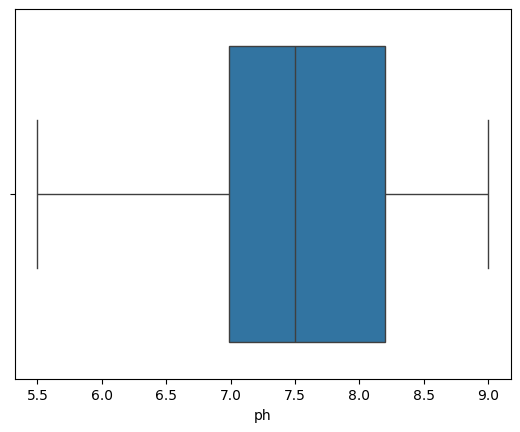

In [ ]:
sns.boxplot(x=df['ph'])

Dari hasil Kotak pada boxplot ph menunjukkan bahwa Tidak ada outlier yang muncul di luar garis whisker pada boxplot tersebut dan ditunjukkan bahwa seluruh nilai pH berada dalam rentang yang wajar berdasarkan distribusi data.

Median (garis tengah dalam box) berada sedikit di atas tengah box, menunjukkan distribusi sedikit condong ke kiri (negatively skewed), tapi tetap relatif simetris. Hal ini mengindikasikan ph kolam umumnya stabil dan tidak banyak variasi ekstrem.



<Axes: xlabel='temperature'>

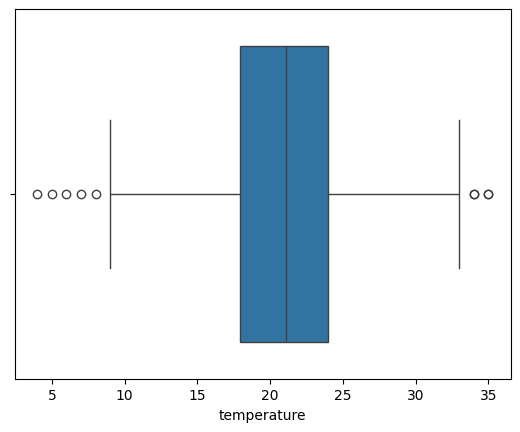

In [ ]:
sns.boxplot(x=df['temperature'])

Pada hasil visualisasi outlier untuk data temperature, didapati bahwa terdapat nilai outlier yang ditunjukan berupa titik-titik disamping median yang mengindikasi bahwa terdapat 2 data yang menyimpan suhu kolam terlalu tinggi, dan 5 data yang menyimpan suhu kolam terlalu rendah. Hal ini kemungkinan bisa terjadi karena adanya kesalahan pencatatan pada sensor, atau kondisi ekstrem pada kolam (misalnya kolam terlalu dingin atau terlalu panas).

<Axes: xlabel='turbidity'>

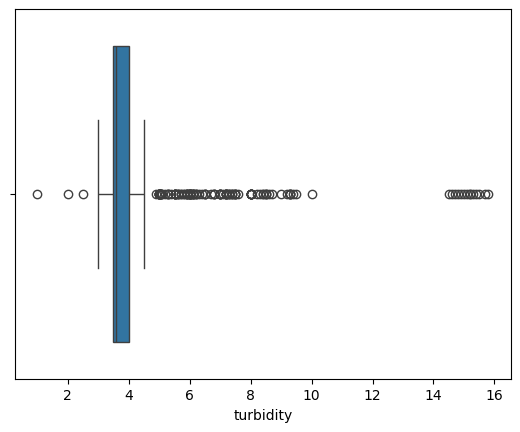

In [ ]:
sns.boxplot(x=df['turbidity'])

Pada hasil visualisasi outlier untuk data turbidity, didapati hasil bahwa terdapat banyak titik outlier, baik di sisi kiri (nilai kekeruhan sangat rendah) maupun kanan (sangat tinggi) yang dimana outlier kanan sangat ekstrem, dengan nilai hingga mendekati 16 NTU, padahal batas atas normal (whisker) hanya sekitar 5–6 NTU. Hal ini mengindikasikan bahwa sebagian besar data berada di rentang normal, tapi ada kelompok data kecil dengan tingkat kekeruhan yang sangat tinggi.



In [ ]:
#Menangani Outlier
numeric_cols = df.select_dtypes(include='number').columns
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[filter_outliers]
df.shape

(460, 4)

Setelah ditunjukkan pada visualisasi bahwa terdapat outlier pada data temperature dan turbidity, dilakukan penanganan outlier menggunakan metode IQR (Index Quartile Range) untuk menghapus data outlier yang terlalu tersimpan jauh dari nilai median, dan menghapusnya dari dataset.

Dari hasil penjalanan kode, didapati hasil bahwa sekitar 131 data yang memiliki nilai outlier, dan oleh karena itu dihapus dari dataset.

## Univariate Analysis

Dalam tahap ini, Dilakukan tahapan analisa EDA dengan teknik univariate analysis. Hal ini digunakan untuk membagi kolom dataset menjadi dua bagian yaitu numerikal dan kategorikal.

In [ ]:
numerical_features = ['ph', 'temperature', 'turbidity']
categorical_features = ['fish']

Pada kode diatas, data yang menyimpan nilai numerik yaitu ph, temperature, dan turbidity disimpan kedalam fitur numerik dan data jenis ikan tersimpan dalam fitur kategorik.

           jumlah sampel  persentase
fish                                
tilapia              123        26.7
rui                   84        18.3
pangas                68        14.8
katla                 57        12.4
silverCup             48        10.4
shrimp                36         7.8
sing                  32         7.0
koi                   10         2.2
prawn                  2         0.4


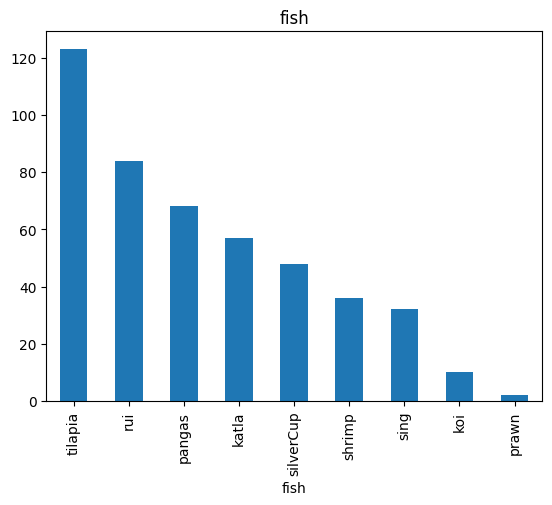

In [ ]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
clean_df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(clean_df)
count.plot(kind='bar', title=feature);

Dari hasil visualiasi dalam mencari jumlah ikan pada dataset, terdapat 9 jenis ikan yang secara berurutan dari jumlahnya yang paling banyak yaitu: tilapia, rui, pangas, katla, silvercup, shrimp, sing, koi, dan udang. Dari data persentase dapat kita simpulkan bahwa lebih dari 60% sampel didapati dari jenis ikan tilapia, dui, dan pangas yang berarti pembudidaya membudiyakan ikan-ikan tersebut dalam jumlah lebih banyak daripada dengan yang lainnya.

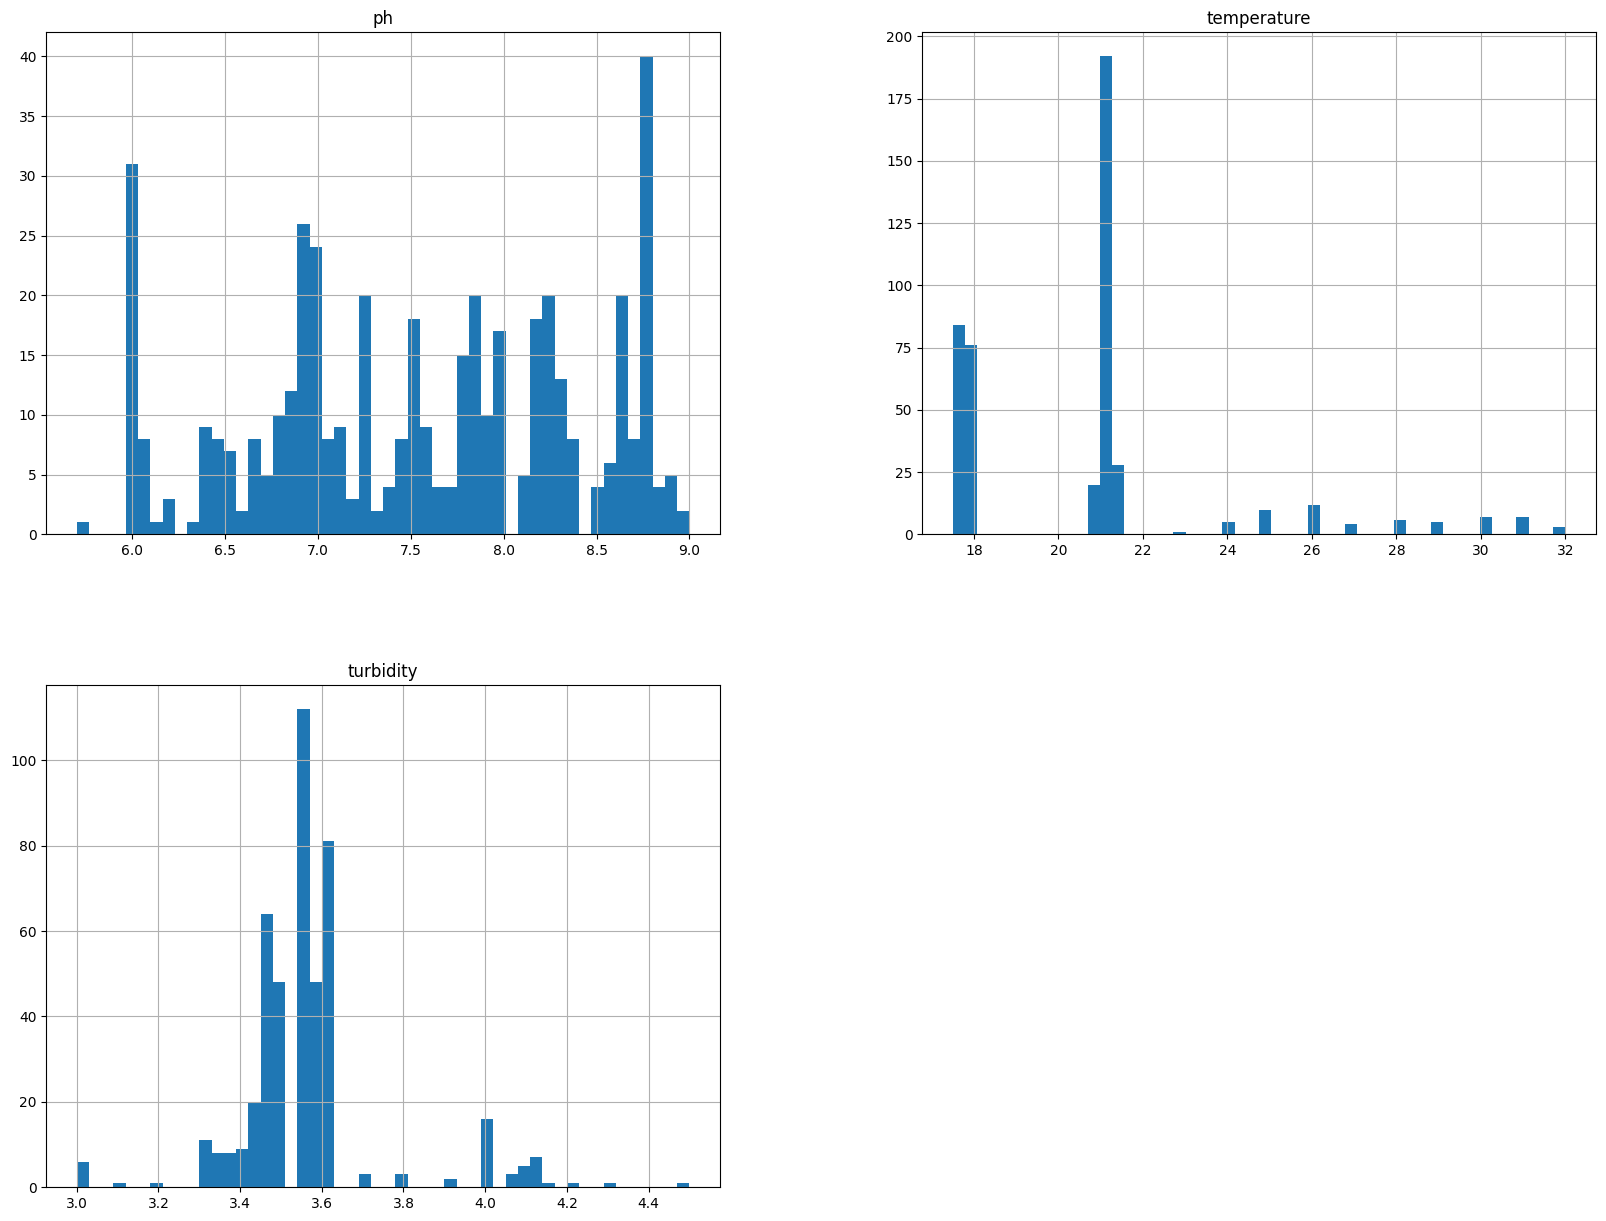

In [ ]:
#Numerical Feature

df.hist(bins=50, figsize=(20,15))
plt.show()

Dari hasil tiga histogram, menunjukkan frekuensi nilai-nilai dalam rentang tertentu.
1. pH: Sebagian besar nilai pH air kolam berada dalam rentang 5.8 hingga 8.9 dengan distribusi multimodal, yang menunjukkan adanya variasi besar pada tingkat keasaman air. Beberapa puncak frekuensi muncul di sekitar nilai 6.0, 7.0, dan 8.5, menandakan kemungkinan perbedaan kondisi air tergantung jenis ikan atau kolam.

2. Temperature: Distribusi temperatur didominasi oleh nilai di sekitar 21°C, yang menunjukkan bahwa sebagian besar kolam memiliki suhu air yang stabil. Terdapat juga sejumlah kecil data dengan temperatur yang jauh lebih tinggi, menunjukkan keberadaan outlier yang perlu dianalisis lebih lanjut.

3. Turbidity: Tingkat kekeruhan air (turbidity) terdistribusi secara sempit di sekitar nilai 3.5 hingga 3.7, yang menandakan bahwa sebagian besar kolam memiliki tingkat kekeruhan yang serupa. Meskipun demikian, terdapat beberapa nilai ekstrem di luar rentang ini yang berpotensi sebagai outlier.

## Multivariate Analysis

<ipython-input-14-c487bc3cef7c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="fish", y=num_col, kind="bar", dodge=False, height = 4, aspect = 3, data=df, palette="Set3")


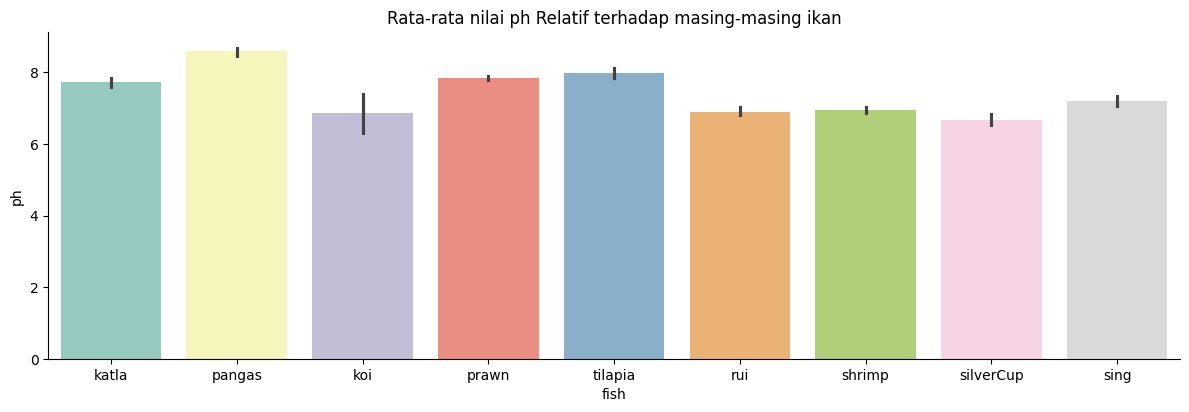

<ipython-input-14-c487bc3cef7c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="fish", y=num_col, kind="bar", dodge=False, height = 4, aspect = 3, data=df, palette="Set3")


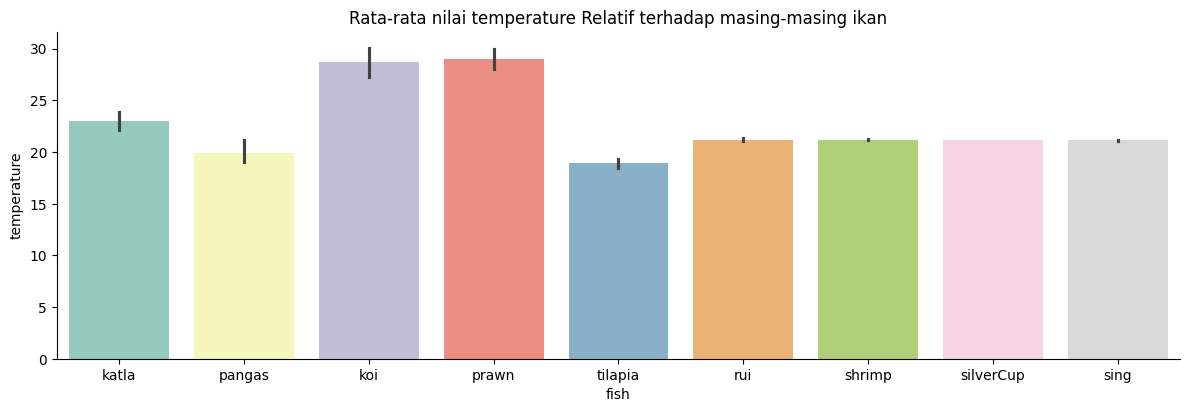

<ipython-input-14-c487bc3cef7c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="fish", y=num_col, kind="bar", dodge=False, height = 4, aspect = 3, data=df, palette="Set3")


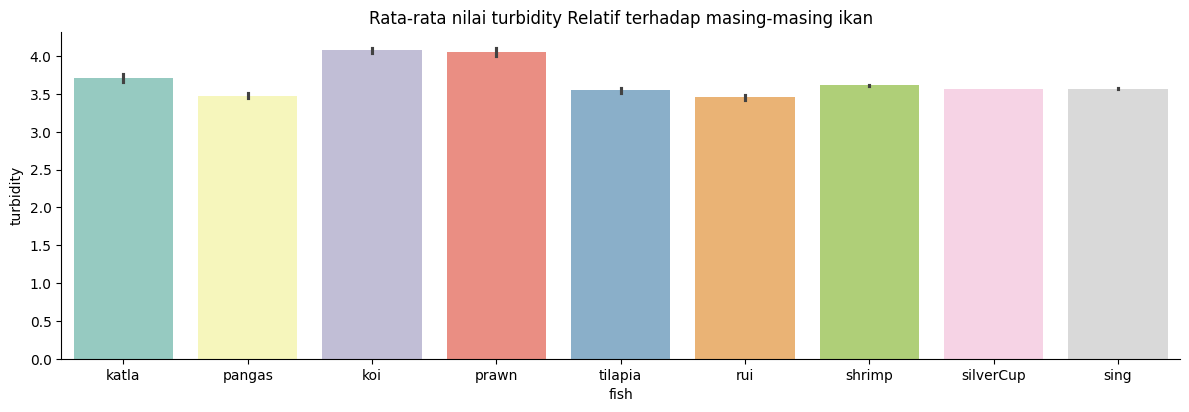

In [ ]:
numerical_features = ['ph', 'temperature', 'turbidity']

for num_col in numerical_features:
  sns.catplot(x="fish", y=num_col, kind="bar", dodge=False, height = 4, aspect = 3, data=df, palette="Set3")
  plt.title(f"Rata-rata nilai {num_col} Relatif terhadap masing-masing ikan")
  plt.show()

Dari hasil data tiga grafik batang, satu untuk setiap fitur numerik (ph, temperature, turbidity), dengan jenis ikan di sumbu x.
1. Rata-rata ph terhadap jenis Ikan:
Visualisasi ini menunjukkan rata-rata nilai pH air kolam berdasarkan jenis ikan. Pangas memiliki rata-rata pH tertinggi sekitar 8.6, menunjukkan preferensi terhadap air lebih basa. Sementara silverCup, shrimp, dan rui hidup dalam air dengan pH lebih rendah (6.8–7.0). Tilapia dan prawn berada di rentang netral hingga sedikit basa (7.8–8.0). Ini penting dalam pengelolaan kualitas air karena menunjukkan kebutuhan pH optimal yang berbeda untuk setiap jenis ikan.

2. Rata-rata temperature terhadap Jenis Ikan:
Visualisasi ini menunjukkan distribusi suhu air kolam. Nilai suhu mayoritas berkisar antara 18°C hingga 25°C, dengan median sekitar 21°C.. Penyebaran data cukup simetris dan terkonsentrasi di tengah, menandakan kestabilan suhu air pada sebagian besar waktu.

3. Rata-rata turbidity Relatif terhadap Jenis Ikan:
Visualisasi ini menunjukkan distribusi yang condong ke kanan, dengan banyak outlier di sisi atas. Mayoritas data berada di sekitar nilai 3.5 hingga 5 NTU. Ini menunjukkan bahwa meskipun kebanyakan kolam memiliki tingkat kekeruhan yang rendah hingga sedang, ada kondisi tertentu yang menyebabkan kekeruhan tinggi.



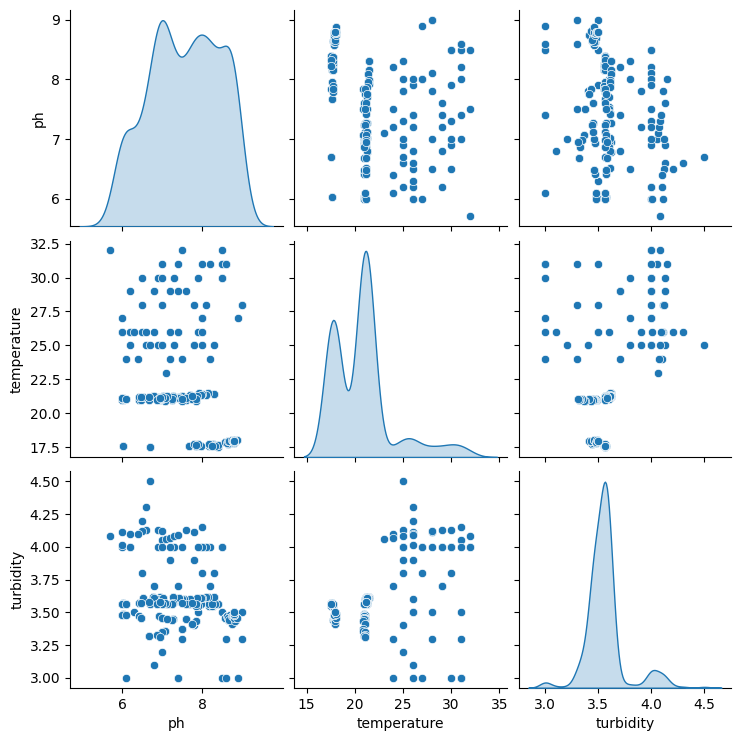

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot() (NUMERICAL FEATURES)
sns.pairplot(df, diag_kind = 'kde')

Dari hasil visualisi diatas, dapat dijelaskan bahwa:
1. pH: Distribusi pH dalam data ini menunjukkan sebagian besar nilai berada di rentang netral hingga sedikit basa, terkonsentrasi kuat antara 7 hingga 8.5. Hal ini mengindikasikan bahwa kondisi keasaman atau kebasaan lingkungan yang diukur cenderung stabil dan berada dalam kisaran tersebut.

2. Suhu: Data suhu menampilkan dua kelompok utama, satu di sekitar 22-25°C dan lainnya di sekitar 18-20°C. Pola bimodal ini menunjukkan kemungkinan adanya variasi suhu yang signifikan, mungkin disebabkan oleh perbedaan waktu pengukuran atau kondisi lingkungan yang bervariasi pada saat data dikumpulkan.

3. Kekeruhan: Kekeruhan dalam dataset ini dominan berada di kisaran 3.5 hingga 4.0, menunjukkan bahwa sebagian besar sampel memiliki tingkat kejernihan yang serupa. Meskipun ada beberapa nilai di luar rentang ini, konsentrasi data yang ketat mengindikasikan kondisi kekeruhan yang cukup konsisten.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

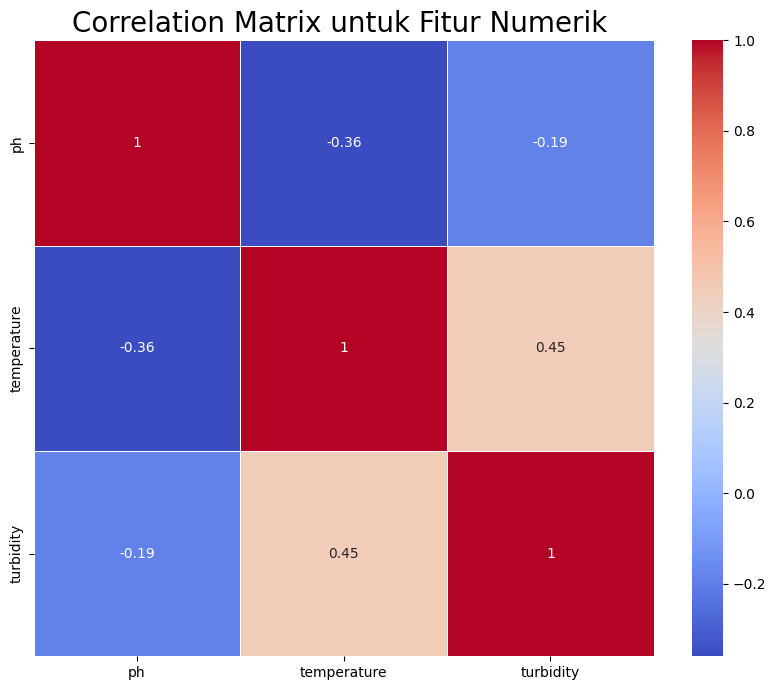

In [ ]:
#Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Dari hasil korelasi amtrix diatas, dapat dijelaskan bahwa:

1. Korelasi Negatif Moderat antara pH dan Suhu: Terdapat korelasi negatif yang moderat (-0.36) antara pH dan suhu. Ini berarti bahwa seiring dengan peningkatan suhu, nilai pH cenderung sedikit menurun, dan sebaliknya. Meskipun tidak sangat kuat, ada kecenderungan hubungan terbalik di antara keduanya.

2. Korelasi Positif Moderat antara Suhu dan Kekeruhan: Ada korelasi positif yang moderat (0.45) antara suhu dan kekeruhan. Hal ini mengindikasikan bahwa seiring dengan peningkatan suhu, tingkat kekeruhan cenderung sedikit meningkat.

3. Korelasi Negatif Lemah antara pH dan Kekeruhan: Korelasi antara pH dan kekeruhan sangat lemah (-0.19). Ini menunjukkan bahwa perubahan pada pH hampir tidak memiliki pengaruh linier terhadap kekeruhan, atau sebaliknya. Hubungan di antara keduanya bisa dianggap sangat minim atau tidak ada.

Secara keseluruhan, suhu tampaknya memiliki hubungan yang lebih jelas dengan pH (negatif) dan kekeruhan (positif) dibandingkan dengan hubungan antara pH dan kekeruhan itu sendiri. Kekuatan korelasi yang ditemukan moderat, menunjukkan adanya kecenderungan hubungan namun tidak berarti hubungan sebab-akibat yang kuat atau sempurna.

# Data Preparation

Tahap selanjutnya setelah EDA ialah mempersiapkan data untuk proses modelling yaitu Data Preparation. Data Preparation digunakan untuk memastikan data yang digunakan bersih, lengkap, dan sesuai format untuk proses pemodelan. Dengan menyiapkan data secara tepat, model yang dibuat dapat bekerja lebih efisien, akurat, dan mengurangi risiko kesalahan seperti bias atau overfitting.

Tahapan yang dilakukan dalam data preparation yang dilakukan, diantaranya:
Menghitung Rata-rata & Standar Deviasi per Jenis Ikan

1. Mendefinisikan Kisaran Ideal untuk Parameter Air
2. Membuat Fungsi untuk Evaluasi Kualitas Air
3. Menerapkan Fungsi Evaluasi ke Setiap Baris Data
4. Visualisasi Distribusi Kualitas Air
5. Encoding Kategori Jenis Ikan
6. Membagi Data Jadi Training dan Testing Set

In [ ]:
# Menghitung Rata-rata & Standar Deviasi untuk Setiap Jenis Ikan
df.groupby("fish")[["ph", "temperature", "turbidity"]].agg(["mean", "std"]).round(2)

ph       temperature       turbidity      
           mean   std        mean   std      mean   std
fish                                                   
katla      7.74  0.50       22.96  3.22      3.71  0.18
koi        6.86  0.94       28.70  2.41      4.08  0.06
pangas     8.59  0.49       19.94  4.45      3.47  0.15
prawn      7.85  0.07       29.00  1.41      4.06  0.08
rui        6.91  0.56       21.16  0.79      3.45  0.15
shrimp     6.95  0.26       21.19  0.06      3.61  0.01
silverCup  6.68  0.56       21.13  0.06      3.56  0.00
sing       7.20  0.41       21.12  0.08      3.57  0.01
tilapia    7.99  0.72       18.89  2.86      3.55  0.19

Tabel ini memberikan gambaran tentang karakteristik lingkungan (pH, suhu, dan kekeruhan) di mana berbagai jenis ikan (katla, koi, pangas, prawn, rui, shrimp, silverCup, sing, tilapia) ditemukan atau hidup. Dengan melihat rata-rata dan standar deviasi, kita dapat mengidentifikasi preferensi atau toleransi lingkungan yang berbeda untuk setiap spesies.

In [ ]:
ideal_range = {
    'ph': (6.5, 8.5),
    'temperature': (20, 30),
    'turbidity': (0, 5)
}

Pada tahap ini, didefinisikan rentang nilai ideal untuk pH, suhu, dan kekeruhan air. Rentang ini digunakan sebagai acuan untuk menilai kualitas air.

In [ ]:
def evaluate_water_quality(row):
    score = 0

    # Cek pH
    if ideal_range['ph'][0] <= row['ph'] <= ideal_range['ph'][1]:
        score += 1

    # Cek Suhu
    if ideal_range['temperature'][0] <= row['temperature'] <= ideal_range['temperature'][1]:
        score += 1

    # Cek Kekeruhan
    if ideal_range['turbidity'][0] <= row['turbidity'] <= ideal_range['turbidity'][1]:
        score += 1

    # Evaluasi Total Skor
    if score == 3:
        return "Good"
    elif score == 2:
        return "Okay, Needed Care"
    else:
        return "Bad"


Pada tahap ini dibuatkan sebuah fungsi untuk memeriksa apakah nilai setiap parameter air pada satu baris data masuk dalam rentang ideal.Setiap parameter yang sesuai mendapat skor 1.

Total skor menentukan kategori kualitas air:

3 → "Good", yang berarti kualitas air sudah cukup bagus untuk melakukan pembudidayaan ikan

2 → "Okay, Needed Care", yang berarti kualitas air berada di batasan layak untuk digunakan namun dibutuhkan perawatan lebih lanjut

0-1 → "Bad", yang berarti bahwa kualitas air sudah tidak layak untuk dilakukan pembudidayaan, dan harus segera dilakukan perawatan intensif.



In [ ]:
df['quality'] = df.apply(evaluate_water_quality, axis=1)
df[['ph', 'temperature', 'turbidity', 'quality']].head()

<ipython-input-20-efe254c2d226>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality'] = df.apply(evaluate_water_quality, axis=1)


,ph,temperature,turbidity,quality
0,6.0,27.0,4.0,"Okay, Needed Care"
5,6.9,25.0,4.0,Good
6,7.3,30.0,4.0,Good
7,7.2,29.0,4.0,Good
8,7.5,32.0,4.0,"Okay, Needed Care"


Pada tahapan diatas, dilakukan memasukkan hasil evaluasi kualitas air pada tahap sebelumnya kedalam seluruh data pada dataset yang disimpan dalam kolom baru bernama 'quality'.

<ipython-input-21-76551eede5ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='Set2')


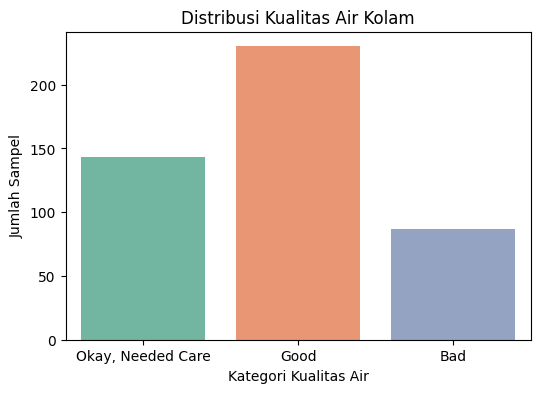

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df, palette='Set2')
plt.title('Distribusi Kualitas Air Kolam')
plt.xlabel('Kategori Kualitas Air')
plt.ylabel('Jumlah Sampel')
plt.show()


Dari hasil distribusi diatas, ditunjikkan bahwa kategori kualitas air yang didapati setelah diberikan kategori, kualitas "Good" mendapatkan jumlah yang lebih banyak dibandingkan dengan yang lain sekitar 250. Hal ini menunjukkan bahwa pembudidaya memberikan kualitas air yang bagus, namun terdapat juga kategori kualitas air yang jelek yang harus perlu ditinjau ulang.

In [ ]:
le = LabelEncoder()
df['fish'] = le.fit_transform(df['fish'])

<ipython-input-22-049ca99a18bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fish'] = le.fit_transform(df['fish'])


Pada tahap ini, dilakukan encoding label untuk mengganti nilai-nilai teks pada kolom fish dengan angka bulat. Setiap jenis ikan yang unik akan diberi label numerik yang berbeda Setelah operasi ini, kolom fish dalam DataFrame Anda akan berisi angka-angka, bukan lagi nama ikan dalam bentuk teks.

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['fish', 'ph', 'temperature', 'turbidity']]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Setelah data telah dibersihkan dan dibuat dengan preferensi sendiri, selanjutnya adalah menbagi data menjadi dua bagian yaitu data training dan data testing guna melatih model dalam mengidentifikasi jenis kategori kualitas air untuk data baru. Pembagian ini dilakukan menggunakan fungsi train_test_split.

# Modelling

Setelah data yang dibutuhkan telah siap, selanjutnya ialah proses membangun model prediktif menggunakan teknik machine learning. Data yang telah dipersiapkan digunakan untuk melatih dan menguji berbagai algoritma seperti KNN, RandomForest, atau Boosting Algorithm untuk menemukan model terbaik. Aktivitas utama meliputi pemilihan metode modeling yang sesuai, pelatihan model dengan data training, pengujian model menggunakan data testing, serta evaluasi performa model menggunakan metrik seperti akurasi

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


# Inisialisasi model
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Training dan evaluasi
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel: {name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))



Model: KNN
Accuracy: 0.9130434782608695
                   precision    recall  f1-score   support

              Bad       0.88      0.88      0.88        17
             Good       0.88      1.00      0.94        45
Okay, Needed Care       1.00      0.80      0.89        30

         accuracy                           0.91        92
        macro avg       0.92      0.89      0.90        92
     weighted avg       0.92      0.91      0.91        92


Model: Random Forest
Accuracy: 0.9782608695652174
                   precision    recall  f1-score   support

              Bad       1.00      0.88      0.94        17
             Good       1.00      1.00      1.00        45
Okay, Needed Care       0.94      1.00      0.97        30

         accuracy                           0.98        92
        macro avg       0.98      0.96      0.97        92
     weighted avg       0.98      0.98      0.98        92


Model: AdaBoost
Accuracy: 0.9565217391304348
                   precision  

Kode tersebut digunakan untuk membandingkan performa tiga model klasifikasi, yaitu K-Nearest Neighbors (KNN), Random Forest, dan AdaBoost. Setiap model dilatih menggunakan data training dan diuji dengan data testing. Hasil prediksi kemudian dievaluasi menggunakan metrik akurasi dan classification report yang mencakup precision, recall, dan f1-score. Tujuan dari proses ini adalah untuk menentukan model mana yang memberikan hasil terbaik dalam mengklasifikasikan kualitas air kolam berdasarkan parameter yang tersedia.

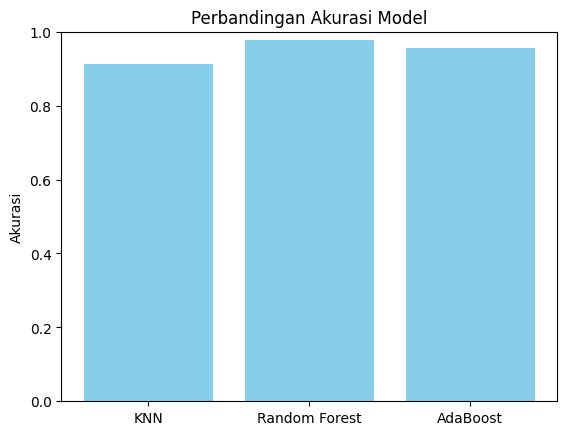

In [ ]:
import matplotlib.pyplot as plt

model_akurasi = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_akurasi.append((name, acc))

# Plot
nama_model, akurasi = zip(*model_akurasi)
plt.bar(nama_model, akurasi, color='skyblue')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model')
plt.ylim(0, 1)
plt.show()


Dari hasil pengujian ketiga algoritma (KNN, RandomForest, dan Adaboost), didapati hasil bahwa ketiga algoritma dapat digunakan untuk identifikasi kategori kualitas air kolam. Oleh karena itu, digunakan algoritma RandomForest karena didapati hasil paling tunggu untuk melakukan klasifikasi.

In [ ]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Setelah ditentukan jenis algoritma yang akan digunakan, selanjutnya memasukkan algoritma tersebut (RandomForest) dipakai untuk memprediksi data kualitas air baru

#Evaluation

Setelah model telah dikembangkan, tahap selanjutnya adalah melakukan evaluasi model dengan memasukkan data baru kedalam dataset untuk mengklasifikasi kategori kualitas air kolam untuk budidaya ikan

In [ ]:
# Prediksi data baru
new_data = pd.DataFrame({
    'fish': [le.transform(['pangas'])[0]],
    'ph': [6.5],
    'temperature': [28],
    'turbidity': [20]
})

# Prediksi kualitas air
hasil_prediksi = best_model.predict(new_data)
print("Prediksi kualitas air:", hasil_prediksi[0])


Prediksi kualitas air: Good


Pada kode diatas, dibuatkan sebuah contoh data baru berupa jenis ikan, tingkat ph, suhu, dan kekeruhan air. Kemudian, data baru tersebut diuji oleh model untuk mendapatkan kualitas air kolam dengan menganalisa tingkat ph, suhu, dan kekeruhan. Hasil yang didapatkan dari kualitas kolam tersebut adalah 'good' yang berarti kualitas air layak digunakan. Kesimpulan yang didapati adalah, pengembangan model telah berhasil dan dapat digunakan dalam klasifikasi kualitas air kolam untuk budidaya ikan.